Importacion de las librerias

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf


Carga de los datos

In [21]:
from google.colab import drive
drive.mount('/gdrive')

ruta = "/gdrive/MyDrive/Escuela/Mineria/vehiculos_procesado.csv"
data = pd.read_csv(ruta,encoding ="latin1")


Mounted at /gdrive


Muestra de los datos iniciales de cada una de las columnas de los datos

In [22]:
data.head()


,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2,consumo_std,desplazamiento_std
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706,-0.653195,-0.613385
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,-1.565710,0.676220
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500,-0.881324,-0.613385
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,-1.565710,0.676220
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,16,555.437500,-0.881324,0.372783


Selecion de columnas a utilizar

In [23]:
X = data[['desplazamiento', 'cilindros']]
y = data['co2']
data.shape


(35539, 13)

Divicion de los datos en subconjuntos, asignacion de la variable de predccion e imprecion del coeficieonte

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)

print(reg.coef_)


[52.17443195  9.46732995]


Calculo del error cuadratico medio

In [25]:
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)


Error cuadrático medio: 3867.151353645166


Graficasion de kas variables y su dispercion

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


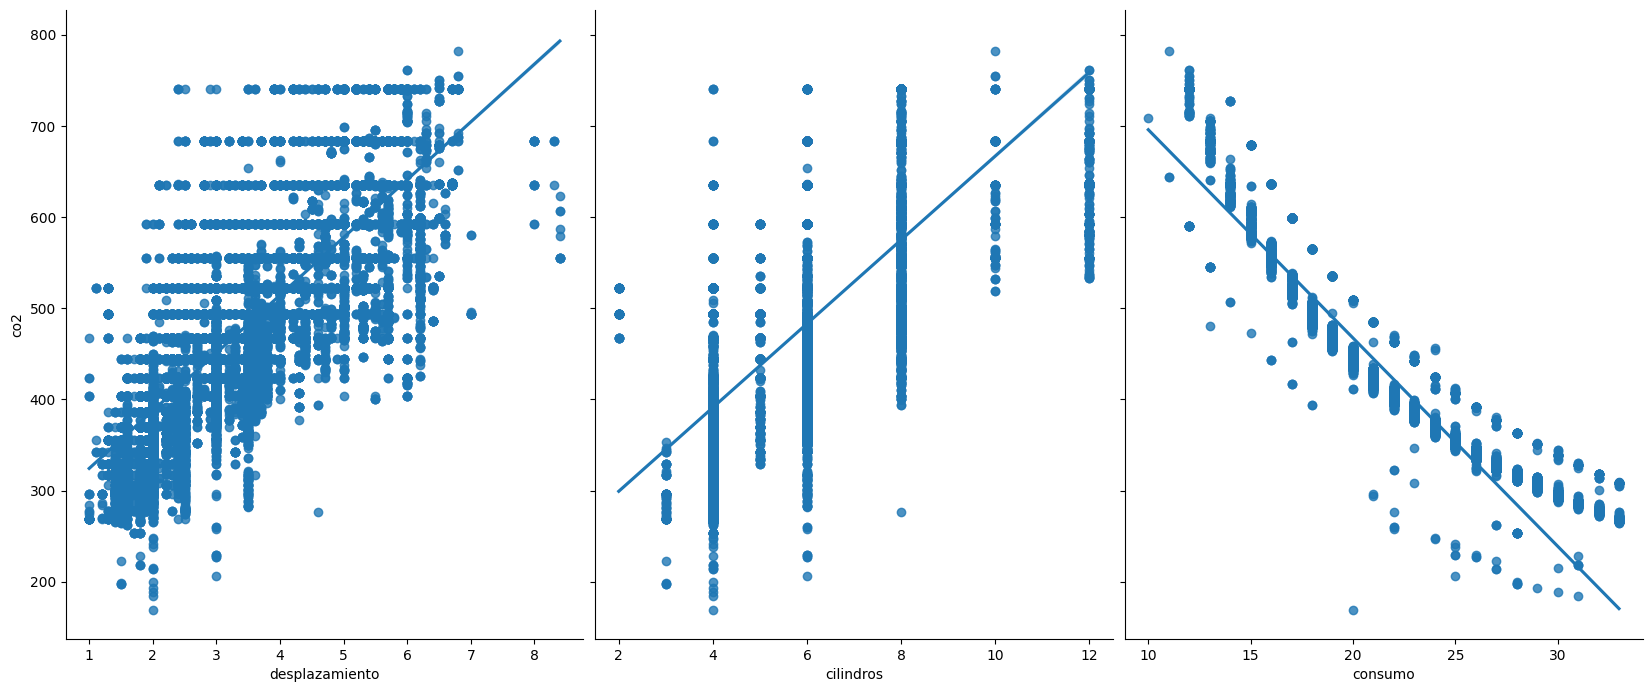

In [26]:
import seaborn as sns
sns.pairplot(data, x_vars=['desplazamiento','cilindros','consumo'], y_vars='co2', size=7, aspect=0.8,kind = 'reg')

#Conclusion
Despues de realizar el analicis de los datos obtenidos se puede concluir que se tiene principalmnete dos causas de una gran emicion de carbono, el primero es la distancia que se desplaza y el segundo el consumo de klos vehiculos, ya que se puede ver que en la tabla de desplazamiento un aumneto gradual en funcion a mayor sea la distancia recorrida y en el caso del consumo se puede denotar una mayor emicion en distancias cortas.